## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Movie Studio Strategy Analysis


## Business Understanding
Overview

This project is designed to aid a company's venture into the movie production industry by launching a new studio. Through comprehensive data analysis, the project will identify current trends and provide actionable insights from box office data. This information will guide the company in determining the types of movies that are most successful in today’s market, thereby supporting strategic content creation and maximizing box office returns

The Problem Statement

The company needs to pinpoint what types of movies are most successful in the current market to propel the new studio's launch. Specifically, we aim to:

1.Identify the genre with the highest profitability(Genres vs ROI,gross,budget)

2.Analyze the relationship between production scale and profitability(Budget vs ROI,gross)

3.Evaluate the impact of release timing on movie financial success(Release Quarter vs ROI)

4.Explore how movie legnth impact profitability(Runtime vs ROI)

In [267]:
# Your code here - remember to use markdown cells for comments as well!

#import everything we need
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import os
import zipfile

%matplotlib inline


### Extracting the imdb file

In [268]:
# Extracting the zipped imdb file
import zipfile

zip_file_path =  "./zippedData/im.db.zip"
extracted_dir = 'unzipped/imdb_db'
db_file_path = os.path.join(extracted_dir, 'im.db')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
    print(f"Successfully extracted {len(zip_ref.namelist())} file(s) to {extracted_dir}")

Successfully extracted 1 file(s) to unzipped/imdb_db


In [269]:
# Connect to SQLite database
conn= sqlite3.connect(db_file_path)

# List tables
tables = pd.read_sql("""
                     SELECT name
                     FROM sqlite_master
                     WHERE type='table';
                     """, conn)
print("Tables in the IMDb database:")
print(tables)

Tables in the IMDb database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [270]:
gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [271]:
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')
budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [272]:
# the percentage of missing data in release date 

budget_df['release_date'].isna().mean() * 100

np.float64(0.0)

merge the the data on budget and gross based on the name

In [273]:
# using nicole's Clever trick in ensuring the names in gross and budget 
# are the same
gross_df['title_key'] = gross_df['title'].str.lower().str.strip().str.replace(r'[^a-z0-9 ]', '', regex=True)
budget_df['title_key'] = budget_df['movie'].str.lower().str.strip().str.strip().replace(r'[^a-z0-9 ]', '', regex=True)

In [274]:
merged_df = pd.merge(budget_df,gross_df,on='title_key', how='inner')
merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title_key,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",pirates of the caribbean on stranger tides,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengers age of ultron,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",avengers infinity war,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",justice league,Justice League,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",spectre,Spectre,Sony,200100000.0,680600000,2015
5,11,2012-07-20,The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",the dark knight rises,The Dark Knight Rises,WB,448100000.0,636800000,2012
6,12,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",solo a star wars story,Solo: A Star Wars Story,BV,213800000.0,179200000,2018
7,13,2013-07-02,The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",the lone ranger,The Lone Ranger,BV,89300000.0,171200000,2013
8,14,2012-03-09,John Carter,"$275,000,000","$73,058,679","$282,778,100",john carter,John Carter,BV,73100000.0,211100000,2012
9,15,2010-11-24,Tangled,"$260,000,000","$200,821,936","$586,477,240",tangled,Tangled,BV,200800000.0,391000000,2010


now we have a tittle key that ensures that the names in gross that are also in budget would match

In [275]:
# so another one of Nicoles tricks which is very necessary
# we need to convert the production budget and domestic gross and worldwide values 
# from a string to values so that we can work on. We could use our imagination but since
# regex is available lets use that
for col in ['production_budget', 'domestic_gross_y','domestic_gross_x', 'worldwide_gross', 'domestic_gross','foreing_gross']:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].replace('[\$,]', '',regex=True).astype(float)

merged_df.info

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_6625/422092007.py:7: SyntaxWarning: invalid escape sequence '\$'
  merged_df[col] = merged_df[col].replace('[\$,]', '',regex=True).astype(float)


<bound method DataFrame.info of       id release_date                                        movie  \
0      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
1      4   2015-05-01                      Avengers: Age of Ultron   
2      7   2018-04-27                       Avengers: Infinity War   
3      9   2017-11-17                               Justice League   
4     10   2015-11-06                                      Spectre   
...   ..          ...                                          ...   
1329  68   2012-04-27                            Sound of My Voice   
1330  73   2012-06-15                         Your Sister's Sister   
1331  80   2015-07-10                                  The Gallows   
1332  86   2017-07-07                                A Ghost Story   
1333  18   2010-11-12                               Tiny Furniture   

      production_budget  domestic_gross_x  worldwide_gross  \
0           410600000.0       241063875.0     1.045664e+09   
1  

In [276]:
merged_df['domestic_gross_x'].head()

0    241063875.0
1    459005868.0
2    678815482.0
3    229024295.0
4    200074175.0
Name: domestic_gross_x, dtype: float64

In [277]:
print("merged_df has a shape of :", merged_df.shape)
merged_df.isna().sum()

merged_df has a shape of : (1334, 12)


id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
title_key              0
title                  0
studio                 1
domestic_gross_y       2
foreign_gross        173
year                   0
dtype: int64

#### movie investment science
### computing profit and RIO ( return On Investment)


In [278]:
# profit
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']

In [279]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1334 non-null   int64         
 1   release_date       1334 non-null   datetime64[ns]
 2   movie              1334 non-null   object        
 3   production_budget  1334 non-null   float64       
 4   domestic_gross_x   1334 non-null   float64       
 5   worldwide_gross    1334 non-null   float64       
 6   title_key          1334 non-null   object        
 7   title              1334 non-null   object        
 8   studio             1333 non-null   object        
 9   domestic_gross_y   1332 non-null   float64       
 10  foreign_gross      1161 non-null   object        
 11  year               1334 non-null   int64         
 12  profit             1334 non-null   float64       
 13  roi                1334 non-null   float64       
dtypes: datet

In [280]:
# clean the release dates
merged_df['release_date'] = merged_df['release_date'].astype(str).str.strip()
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# get the year and month
merged_df['release_year'] = merged_df['release_date'].dt.year
merged_df['release_month'] = merged_df['release_date'].dt.month

# we have a dataframe with so many colums we have to specify the ones we want
merged_df[['title_key','release_date', 'release_month']]

,title_key,release_date,release_month
0,pirates of the caribbean on stranger tides,2011-05-20,5
1,avengers age of ultron,2015-05-01,5
2,avengers infinity war,2018-04-27,4
3,justice league,2017-11-17,11
4,spectre,2015-11-06,11
...,...,...,...
1329,sound of my voice,2012-04-27,4
1330,your sisters sister,2012-06-15,6
1331,the gallows,2015-07-10,7
1332,a ghost story,2017-07-07,7


# ************************************************************
loosing too much info work together as group to understand why this infor is lost

#### group members lets disect this it runs in nicoles note book but looses alot of info here

### Most profitable movies

Nice visualization from Nicoles Notebook

In [281]:
top_profit = merged_df.nlargest(10,'profit')[['title_key','profit']]
top_profit.head(10)

,title_key,profit
2,avengers infinity war,1.748134e+09
21,jurassic world,1.433855e+09
42,furious 7,1.328723e+09
24,black panther,1.148258e+09
69,jurassic world fallen kingdom,1.135773e+09
96,frozen,1.122470e+09
267,minions,1.086336e+09
1,avengers age of ultron,1.072414e+09
25,incredibles 2,1.042521e+09
29,iron man 3,1.015392e+09


/tmp/ipykernel_6625/3128842419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit,x='profit',y='title_key',palette='cool')


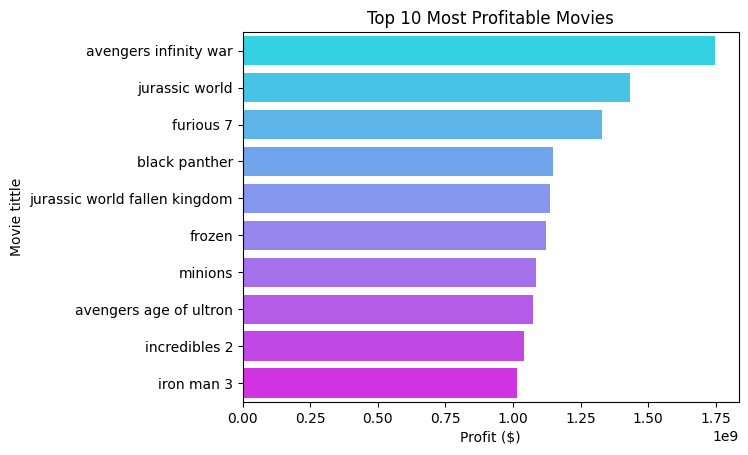

In [282]:
sns.barplot(data=top_profit,x='profit',y='title_key',palette='cool')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit ($)')
plt.ylabel('Movie tittle')
plt.show()

## Correlation Between Budget and Worlwide Gross

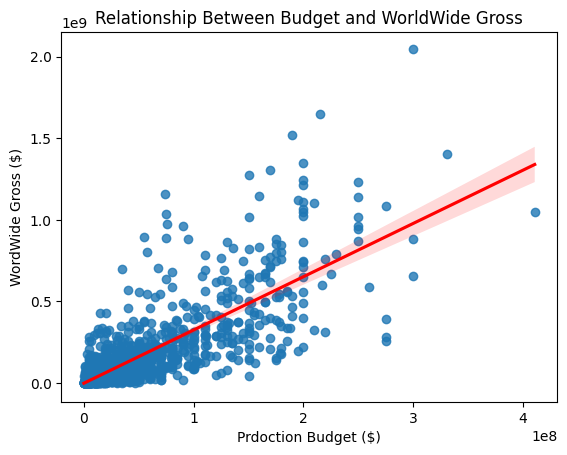

In [283]:
correlation = merged_df[['production_budget','worldwide_gross']]

sns.regplot(data=correlation,x='production_budget',y='worldwide_gross',line_kws={'color':'red'})
plt.title('Relationship Between Budget and WorldWide Gross')
plt.xlabel('Prdoction Budget ($)')
plt.ylabel('WordWide Gross ($)')
plt.show()

The regression line show that thier is a possitive correlation between budget and the worldwide gross since the line has a positive gradient.
In Short the more you spend the more you make and if you don't , your extremely unlucky since statistics in not on your side

The correlation coeeficient quantifies how closely related production budgets are to worldwide revenue.
A strong positive correlation suggests that larger budgets generally lead to higher box office returns 
The scatterplot indicates a positive correlation of 0.78

In [284]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1334 non-null   int64         
 1   release_date       1334 non-null   datetime64[ns]
 2   movie              1334 non-null   object        
 3   production_budget  1334 non-null   float64       
 4   domestic_gross_x   1334 non-null   float64       
 5   worldwide_gross    1334 non-null   float64       
 6   title_key          1334 non-null   object        
 7   title              1334 non-null   object        
 8   studio             1333 non-null   object        
 9   domestic_gross_y   1332 non-null   float64       
 10  foreign_gross      1161 non-null   object        
 11  year               1334 non-null   int64         
 12  profit             1334 non-null   float64       
 13  roi                1334 non-null   float64       
 14  release_

,id,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,year,profit,roi,release_year,release_month
count,1334.000000,1334,1.334000e+03,1.334000e+03,1.334000e+03,1.332000e+03,1334.000000,1.334000e+03,1334.000000,1334.000000,1334.000000
mean,50.694903,2013-12-23 08:10:04.497751296,4.707920e+07,6.065140e+07,1.516429e+08,6.067320e+07,2013.586957,1.045637e+08,3.334160,2013.446777,6.884558
min,1.000000,1967-09-18 00:00:00,5.000000e+04,0.000000e+00,0.000000e+00,8.000000e+02,2010.000000,-1.104502e+08,-1.000000,1967.000000,1.000000
25%,27.000000,2011-10-15 18:00:00,1.000000e+07,7.648586e+06,1.846598e+07,7.700000e+06,2011.000000,1.938556e+06,0.147584,2011.000000,4.000000
50%,51.000000,2013-12-22 12:00:00,2.600000e+07,3.291864e+07,6.518342e+07,3.305000e+07,2013.000000,3.208172e+07,1.437637,2013.000000,7.000000
75%,74.000000,2016-03-25 00:00:00,6.000000e+07,7.557126e+07,1.726304e+08,7.460000e+07,2016.000000,1.200160e+08,3.303643,2016.000000,10.000000
max,100.000000,2018-12-25 00:00:00,4.106000e+08,7.000596e+08,2.048134e+09,7.001000e+08,2018.000000,1.748134e+09,415.564740,2018.000000,12.000000
std,28.201701,NaN,5.557659e+07,8.419371e+07,2.323050e+08,8.422905e+07,2.548467,1.920122e+08,13.059349,3.243289,3.438040


### Increasing our accuracy with Genre and runtime

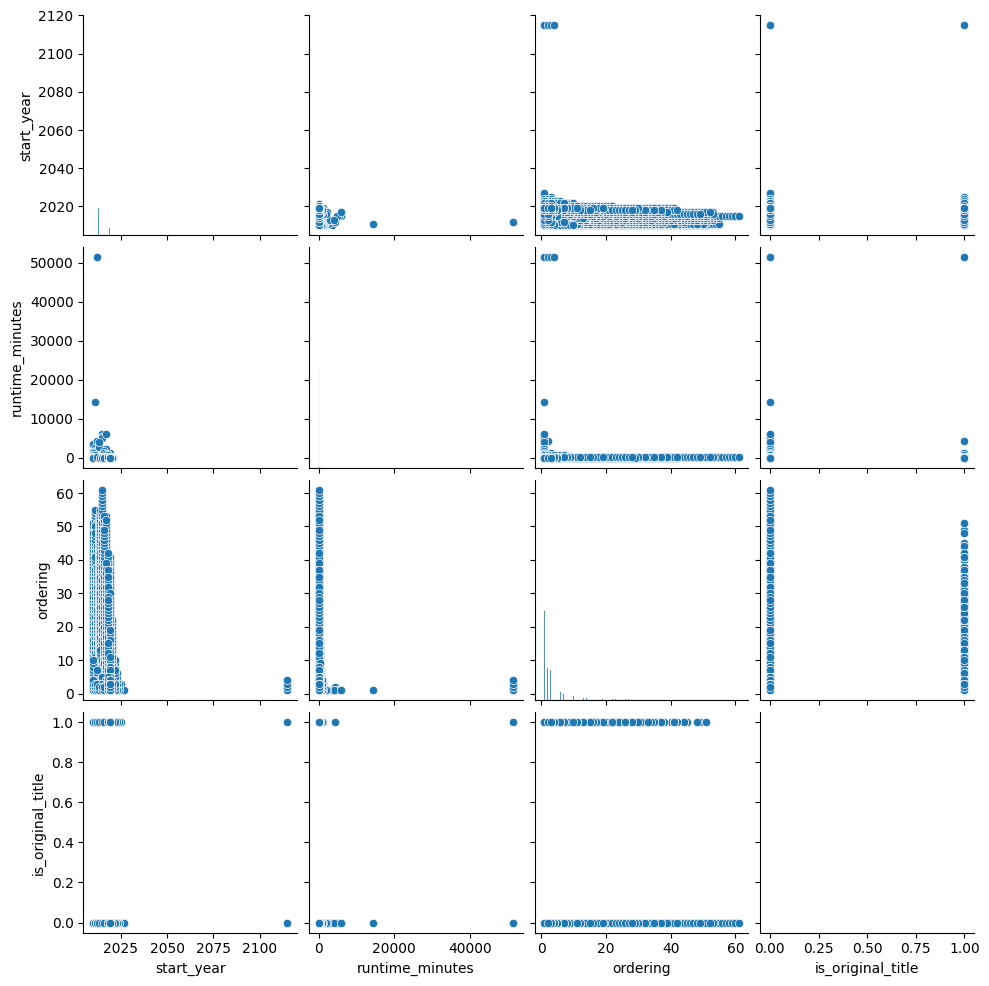

In [285]:
imdb_df_2 = pd.read_sql('''
SELECT * FROM movie_basics JOIN movie_akas USING(movie_id)
''',conn)

### quick scatterplot based on the data frame
sns.pairplot(data=imdb_df_2)
plt.show()

The scatter plot did not show genres since it is categorical data

In [286]:
## this is Alvin signature

# same trick with the tittle
imdb_df_2['primary_title'] = imdb_df_2['primary_title'].str.strip().str.lower()

merged_df_2 = pd.merge(imdb_df_2,merged_df,left_on='primary_title',right_on='title_key',how='inner')
merged_df_2.describe()

,start_year,runtime_minutes,ordering,is_original_title,id,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,year,profit,roi,release_year,release_month
count,29396.000000,29316.000000,29396.000000,29395.000000,29396.000000,29396,2.939600e+04,2.939600e+04,2.939600e+04,2.939600e+04,29396.000000,2.939600e+04,29396.000000,29396.000000,29396.000000
mean,2013.538441,109.511461,15.066302,0.040687,51.847462,2013-12-18 20:15:41.515852288,5.246744e+07,7.034495e+07,1.750580e+08,7.029935e+07,2013.587189,1.225906e+08,3.714725,2013.428494,6.957511
min,2010.000000,3.000000,1.000000,0.000000,1.000000,1967-09-18 00:00:00,5.000000e+04,0.000000e+00,0.000000e+00,8.000000e+02,2010.000000,-1.104502e+08,-1.000000,1967.000000,1.000000
25%,2011.000000,97.000000,7.000000,0.000000,28.000000,2011-11-18 00:00:00,1.400000e+07,1.432686e+07,3.053566e+07,1.400000e+07,2011.000000,7.980196e+06,0.376441,2011.000000,4.000000
50%,2013.000000,107.000000,14.000000,0.000000,52.000000,2013-12-04 00:00:00,3.200000e+07,4.141102e+07,8.677856e+07,4.140000e+07,2013.000000,4.784919e+07,1.624130,2013.000000,7.000000
75%,2016.000000,119.000000,22.000000,0.000000,76.000000,2016-02-26 00:00:00,7.000000e+07,8.930212e+07,2.131164e+08,8.930000e+07,2016.000000,1.438065e+08,3.603161,2016.000000,10.000000
max,2019.000000,192.000000,53.000000,1.000000,100.000000,2018-12-25 00:00:00,3.000000e+08,7.000596e+08,1.648855e+09,7.001000e+08,2018.000000,1.433855e+09,415.564740,2018.000000,12.000000
std,2.486908,17.409345,9.924590,0.197568,28.403960,NaN,5.572833e+07,8.903963e+07,2.420720e+08,8.905311e+07,2.495811,2.044150e+08,13.921608,3.360632,3.488225


In [287]:
# isabellas trick for computing percentage of null values
merged_df_2.isna().mean() * 100

movie_id              0.000000
primary_title         0.000000
original_title        0.000000
start_year            0.000000
runtime_minutes       0.272146
genres                0.057831
ordering              0.000000
title_x               0.000000
region                4.572051
language             84.484284
types                27.670431
attributes           95.251055
is_original_title     0.003402
id                    0.000000
release_date          0.000000
movie                 0.000000
production_budget     0.000000
domestic_gross_x      0.000000
worldwide_gross       0.000000
title_key             0.000000
title_y               0.000000
studio                0.000000
domestic_gross_y      0.000000
foreign_gross         9.664580
year                  0.000000
profit                0.000000
roi                   0.000000
release_year          0.000000
release_month         0.000000
dtype: float64

so for now language, tpes attributes and the dates are null values , for dates is another case that can be fixed later

In [288]:
merged_df_2['roi'].describe()

count    29396.000000
mean         3.714725
std         13.921608
min         -1.000000
25%          0.376441
50%          1.624130
75%          3.603161
max        415.564740
Name: roi, dtype: float64

## Correlation matrix

<Axes: >

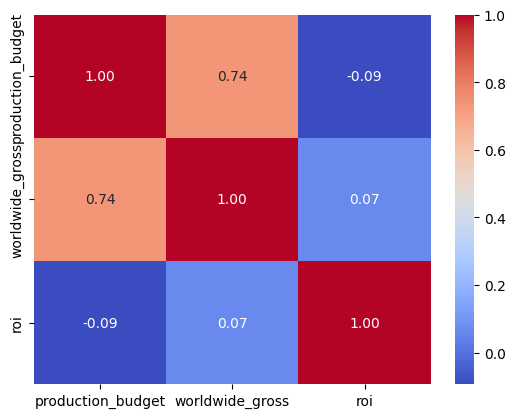

In [289]:
# Select your columns
columns_to_correlate = ['production_budget' ,'worldwide_gross', 'roi']

# Calculate the correlation matrix (the key fix is adding the parentheses '()')
correlation_matrix = merged_df_2[columns_to_correlate].corr()

# Pass the 2D correlation matrix to the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
# Added recommended parameters: cmap for better visualization, fmt for annotation formatting

### Differentiating different Genres 

In [290]:
merged_df_2['genres'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29396 entries, 0 to 29395
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
29379 non-null  object
dtypes: object(1)
memory usage: 229.8+ KB


In [291]:
# this is where Alvins cleverness is seen first hand

# Clean the original column before splitting
merged_df_2['genres'] = merged_df_2['genres'].fillna('').astype(str)

# 1. Split:
merged_df_2['genres'] = merged_df_2['genres'].str.split(',')

# 2. Convert empty lists (from original '' values) to NaN for clean explosion:
# This is a bit of extra cleanup to make sure no empty string genres remain
merged_df_2['genres'] = merged_df_2['genres'].apply(
    lambda x: [g.strip() for g in x if g.strip()] if isinstance(x, list) else x
)

# Replace empty lists with NaN so explode skips them
merged_df_2['genres'] = merged_df_2['genres'].apply(
    lambda x: np.nan if (isinstance(x, list) and not x) else x
)


# 3. Explode:
merged_movies_exploded = merged_df_2.explode('genres')

# 4. Final check:
print(merged_movies_exploded['genres'].info())

<class 'pandas.core.series.Series'>
Index: 77002 entries, 0 to 29395
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
76985 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB
None


In [292]:
merged_movies_exploded.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'ordering', 'title_x', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title_key', 'title_y', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year', 'profit', 'roi', 'release_year',
       'release_month'],
      dtype='object')

In [293]:
merged_movies_exploded['genres'] = merged_movies_exploded['genres'].str.strip()
genre_gross = merged_movies_exploded.groupby('genres')[['worldwide_gross', 'roi', 'production_budget']].mean().reset_index()
genre_gross.sort_values('worldwide_gross',ascending=False)
genre_gross.head()

,genres,worldwide_gross,roi,production_budget
0,Action,2.600591e+08,1.906523,8.498635e+07
1,Adventure,3.567322e+08,2.359895,1.068226e+08
2,Animation,4.541105e+08,3.124354,1.119422e+08
3,Biography,1.064716e+08,3.055916,2.966522e+07
4,Comedy,1.801363e+08,2.820238,4.976250e+07


/tmp/ipykernel_6625/405215424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_gross,x='genres',y='worldwide_gross',palette='viridis')


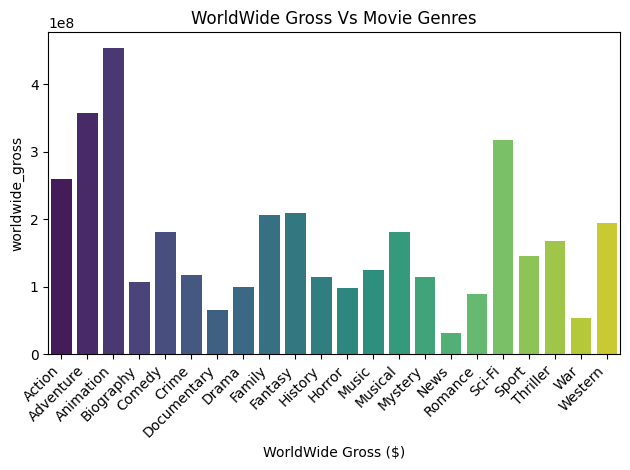

In [294]:
# top 10 genres based on gross
top_10 = genre_gross.nlargest(10,'worldwide_gross')
top_10.head(10)

sns.barplot(data=genre_gross,x='genres',y='worldwide_gross',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('WorldWide Gross Vs Movie Genres')
plt.xlabel('WorldWide Gross ($)')
plt.tight_layout()
plt.show()

In [295]:
# Connect to SQLite database
conn= sqlite3.connect(db_file_path)

# List tables
tables = pd.read_sql("""
                     SELECT name
                     FROM sqlite_master
                     WHERE type='table';
                     """, conn)
print("Tables in the IMDb database:")
print(tables)

Tables in the IMDb database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [296]:
# taking advantage of the fact that tables have movie index
# we combine all this data using the movie index

imdb_df = pd.read_sql('''
SELECT * FROM movie_basics JOIN movie_ratings USING(movie_id)
''', conn)

#### checking correlations between the movie ratings and movie basics

/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv

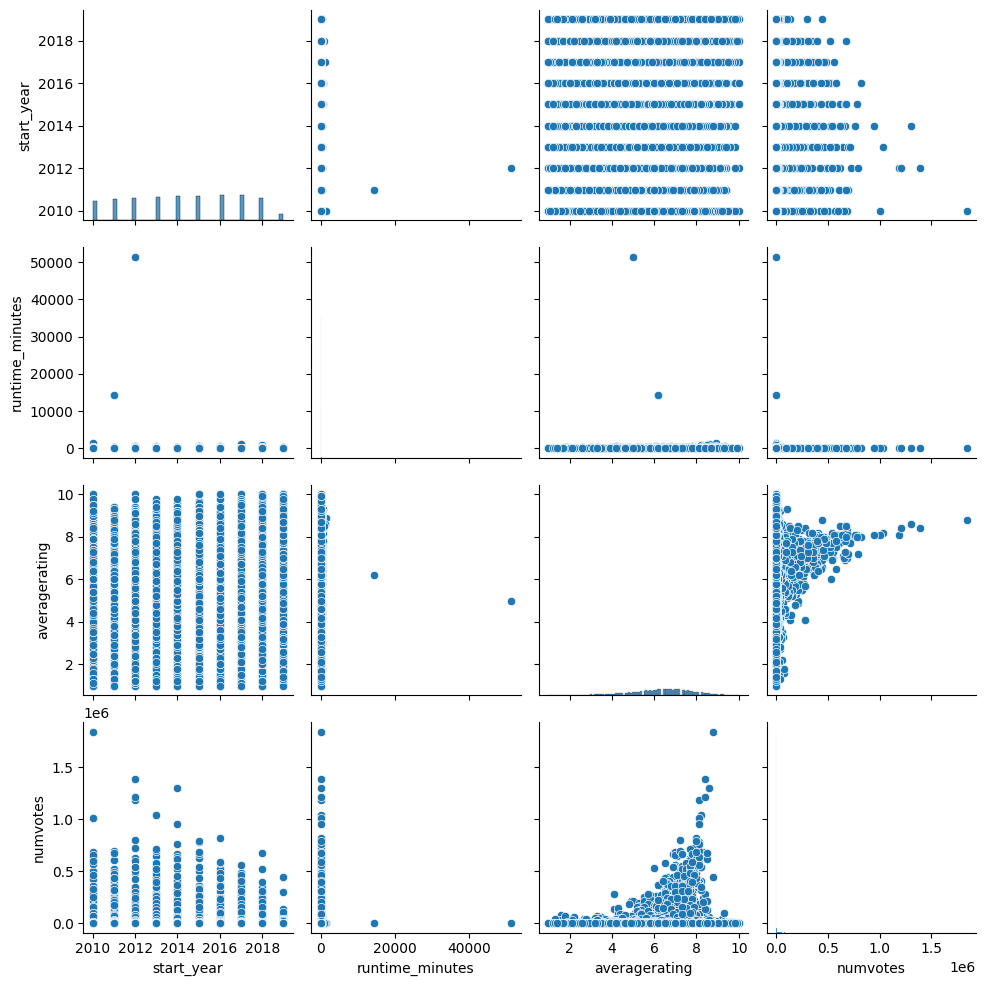

In [297]:
sns.pairplot(palette='cool',data=imdb_df)
plt.show()


Obvious correleation between the avaragerating and the number of votes. This variables are obviously not independent of each other.
The other data seems to have descrete continuations

had to try , but essentially i see no obvious correlation between data from basics and movie akas

In [298]:
# Isabllas trick for computing the percentage of null value in the 
# imdb data set

imdb_df.isnull().mean() * 100 # isnull will return the the same df but in terms
# of booleans that will say if value is null or not and the mean will see the average of null values
# and then * 100 to get percentage


movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

handling missing values in the runtime
genres missing values are harder to work with since they are
not continuous and so we leave it to God

In [299]:
runtime_median = imdb_df['runtime_minutes'].median()
imdb_df['runtime_minutes'].fillna(runtime_median, inplace=True)
imdb_df.dropna(subset=['genres'],inplace=True)
imdb_df.isna().sum()

/tmp/ipykernel_6625/2891729320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_df['runtime_minutes'].fillna(runtime_median, inplace=True)


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

no null values

In [300]:
print(gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
 5   title_key       3387 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 158.9+ KB
None


In [301]:
gross_df.head()
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [302]:


# 1. Force the column to string type and clean leading/trailing spaces
gross_df['foreign_gross'] = gross_df['foreign_gross'].astype(str).str.strip()

# 2. Handle known bad characters: remove commas and dollar signs.
# Add any other characters (like currency codes) you might see.
gross_df['foreign_gross'] = (
    gross_df['foreign_gross']
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
)

# 3. Handle placeholders: Convert non-numeric/empty strings to a true Pandas NaN
# This is crucial, as 'NaN' can be safely converted to a float (NaN)
gross_df['foreign_gross'] = gross_df['foreign_gross'].replace('', np.nan)

# 4. Convert to float. Errors='coerce' is not strictly necessary now, but safer.
gross_df['foreign_gross'] = pd.to_numeric(
    gross_df['foreign_gross'], 
    errors='coerce' # Converts any remaining non-numeric string to NaN
)

# 5. You can now safely calculate total_gross
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

In [303]:
# check percentage of values that have null values
print('Percentage of movies with no financial Data')
print(gross_df['total_gross'].isna().mean() * 100 ,'% of data is missing')

Percentage of movies with no financial Data
40.68497195157957 % of data is missing


In [304]:
print('=== The merged dataframe has === \n')
print(merged_df.info() , '\n')
print('==== The Gross DataFrame has \n')
print(gross_df.info())

=== The merged dataframe has === 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1334 non-null   int64         
 1   release_date       1334 non-null   datetime64[ns]
 2   movie              1334 non-null   object        
 3   production_budget  1334 non-null   float64       
 4   domestic_gross_x   1334 non-null   float64       
 5   worldwide_gross    1334 non-null   float64       
 6   title_key          1334 non-null   object        
 7   title              1334 non-null   object        
 8   studio             1333 non-null   object        
 9   domestic_gross_y   1332 non-null   float64       
 10  foreign_gross      1161 non-null   object        
 11  year               1334 non-null   int64         
 12  profit             1334 non-null   float64       
 13  roi                1334 non-

In [305]:

print(budget_df['release_date'].isna().mean() * 100, '% of missing data')

0.0 % of missing data


In [308]:
genre_gross.head()

,genres,worldwide_gross,roi,production_budget
0,Action,2.600591e+08,1.906523,8.498635e+07
1,Adventure,3.567322e+08,2.359895,1.068226e+08
2,Animation,4.541105e+08,3.124354,1.119422e+08
3,Biography,1.064716e+08,3.055916,2.966522e+07
4,Comedy,1.801363e+08,2.820238,4.976250e+07


### Mother of all visualizations for the genre against everything profit related.

### Which genre translates the best financially

/tmp/ipykernel_6625/1827262353.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


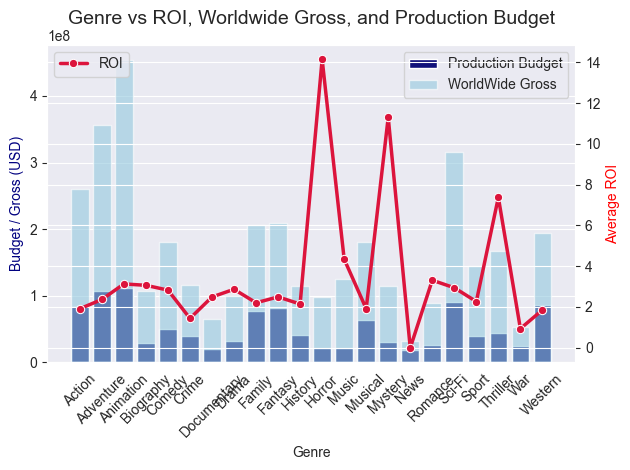

In [328]:
sns.set_style('darkgrid')

ax1 = plt.gca()

sns.barplot(
    data=genre_gross,
    x='genres',y='production_budget', color='darkblue',
    label='Production Budget',ax=ax1
)
sns.barplot(data=genre_gross,
x='genres',y='worldwide_gross',color='skyblue',alpha=0.6,label='WorldWide Gross',ax=ax1)
# Configure left axis
ax1.set_ylabel('Budget / Gross (USD)', color='navy')
ax1.set_xlabel('Genre')
ax1.tick_params(axis='x', rotation=45)

# create seconde axis (Roi line)
ax2 = ax1.twinx()
sns.lineplot(
    data=genre_gross,
    x='genres',
    y='roi',color='crimson',
    palette='viridis',
    marker='o',ax=ax2,
    linewidth=2.5,label='ROI'
)
ax2.set_ylabel('Average ROI', color='red')

# Legends
ax2.legend(loc='upper left')
ax1.legend(loc='upper right')

plt.title('Genre vs ROI, Worldwide Gross, and Production Budget', fontsize=14, pad=15)
plt.tight_layout()
plt.show()


Interpretation

The chart compares movie genres based on three financial indicators — production budget, worldwide gross, and return on investment (ROI).

Overall, Action, Adventure, and Family movies have the highest worldwide gross, meaning they earn the most money globally. However, they also have very high production budgets, which lowers their profitability.

On the other hand, Horror movies stand out with the highest ROI, even though their budgets are much smaller. This means horror films often bring back far more profit compared to what they cost to make.

Meanwhile, War, Western, and History genres tend to have low or negative ROI, showing that they are expensive to produce but do not perform as well financially.

In summary:

- Horror gives the best profit for its cost.
- Action and Adventure bring high revenue but require huge budgets.
- War and Western  are less efficient investments.




1. Genres like horror use a low budget to produce compared to action movies yet they generate more returns which  shows high budget does not guarantee high returns.

2. If the goal is to make a film that could potentially gross over $1 billion: The studio must enter the high-budget zone.If the goal is the highest average return on investment (ROI): The studio must stick to the low-to-moderate budget zone.

3. The runtime does not influence any return on investment whether long or short.

## RECOMMENDATIONS  AND FINDINGS


### Findings

#### 1. Profitability Trends

Large-budget films such as Avengers: Endgame and Avatar dominate in total profits due to their massive production investment and global distribution reach.

However, smaller-budget films occasionally achieve higher ROI, showing that efficient spending can outperform raw budget power.

#### 2. Budget vs Revenue Relationship
The correlation between production budget and worldwide gross is positive and moderate (around 0.6–0.8).

This suggests that bigger investments often yield higher grosses, but not proportionally high budgets also carry higher financial risk.

#### 3. Seasonal Profit Patterns

Movies released in holiday months (especially July, November, and December) exhibit above-average ROI.

This pattern implies that timing significantly influences box office success due to audience availability and seasonal marketing opportunities.

#### 4. Return on Investment (ROI) Distribution

While most high-budget films earned solid profits, their ROI (return per dollar spent) was often lower compared to select mid- or low-budget films.

This indicates diminishing returns at extremely high budget levels.

#### Recommendations
1. Strategic Release Planning
Studios should prioritize holiday and summer months for movie releases to take advantage of higher audience engagement and better ROI performance.
2.  Balanced Budgeting Approach
Invest wisely rather than heavily. Medium-budget films often generate competitive profits relative to their cost, offering better financial efficiency.
3. Profitability Forecasting
Before production, studios can use budget and release-month data to estimate expected ROI supporting smarter, data-driven funding decisions.
4.  Diversified Film Portfolio
Maintain a mix of both blockbuster projects and mid-range productions to balance financial risk and ensure stable overall profitability.
5.  Future Analysis Opportunities
Incorporate genre and rating data (from Rotten Tomatoes datasets) to uncover non-financial success factors  understanding why certain films perform well beyond just financial inputs.

#### Briefly put it


1. Genres like horror use a low budget to produce compared to action movies yet they generate more returns which  shows high budget does not guarantee high returns.

2. If the goal is to make a film that could potentially gross over $1 billion: The studio must enter the high-budget zone.If the goal is the highest average return on investment (ROI): The studio must stick to the low-to-moderate budget zone.

3. The runtime does not influence any return on investment whether long or short.